<a href="https://colab.research.google.com/github/claudio1975/SWISSTEXT_2022/blob/main/NLP_EDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP_&_INSURANCE: EXPLORATORY_DATA_ANALYSIS**

![](https://nlpfinancial.com/wp-content/uploads/2019/01/insurance.jpg)



 







## Import Libraries

In [1]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f30c84c0dc9314498d6e972e3453f2f1a56c62b9358e31d67312bc3b8be53924
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [2]:
# setup deterministic results 
import numpy as np
from numpy.random import seed
seed=0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string
import langdetect 
#import ktrain
#from ktrain import text
import spacy
import gensim
from gensim.models import Word2Vec 
import gensim.downloader as gensim_api
#from bertopic import BERTopic


## Requirements

In [3]:
print(np.__version__) 

1.21.6


In [4]:
print(pd.__version__) 

1.3.5


In [5]:
print(sklearn.__version__)

1.0.2


In [6]:
print(sns.__version__)

0.11.2


In [7]:
print(tf.__version__)

2.9.2


In [8]:
print(spacy.__version__)

3.4.4


In [9]:
print(gensim.__version__)

3.6.0


## Upload dataset

In [10]:
# https://www.kaggle.com/competitions/nlp-getting-started

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/claudio1975/SWISSTEXT_2022/main/data/train.csv')

In [12]:
#from google.colab import files 
#uploaded = files.upload() 

In [13]:
# Reading File
#df = pd.read_csv('train.csv')

## Have a peek of the data set

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
df.shape

(7613, 5)

In [16]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [17]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613.0,NaN,NaN,NaN,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613.0,NaN,NaN,NaN,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


## Target Variable Analysis

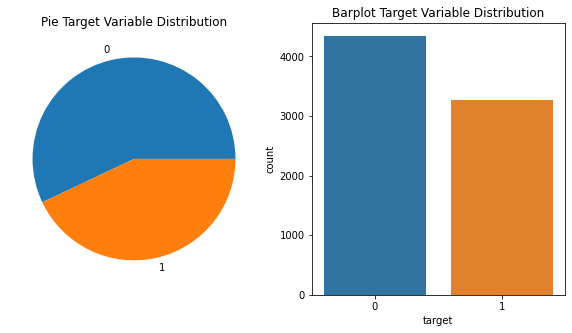

In [19]:
# Plot the target variable 
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
pieplot = df.groupby('target').count()['id'].plot(kind='pie',ax=axes[0]).set_title("Pie Target Variable Distribution")
barplot = sns.countplot(x=df['target'], data=df, ax=axes[1]).set_title("Barplot Target Variable Distribution")

axes[0].set_ylabel('')

plt.show()

In [20]:
# Summarize the class distribution 
count = pd.crosstab(index = df['target'], columns="count")
percentage = pd.crosstab(index = df['target'], 
                         columns="frequency")/pd.crosstab(index = df['target'], columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
target,,
0,4342,0.57034
1,3271,0.42966


## Keyword and Location analysis

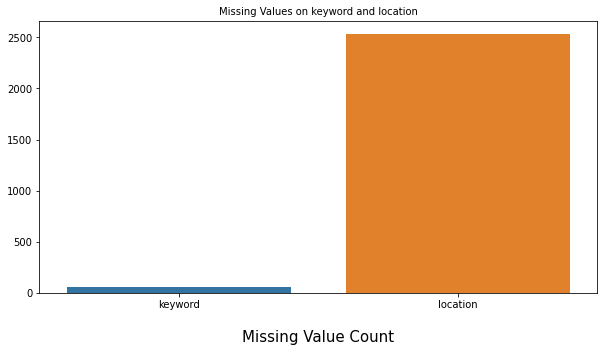

In [21]:
missing_cols = ['keyword', 'location']

fig = plt.figure(figsize = (10, 5))
sns.barplot(x=df[missing_cols].isnull().sum().index, y=df[missing_cols].isnull().sum().values)
plt.xlabel('Missing Value Count', size=15, labelpad=20)
plt.title('Missing Values on keyword and location', fontsize=10)

plt.show()

In [22]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

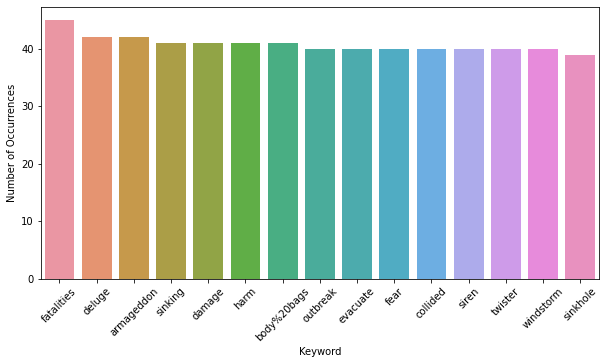

In [23]:
cnt_keyword = df['keyword'].value_counts()
top_15 = cnt_keyword.nlargest(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_15.index, y=top_15.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Keyword', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [24]:
df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

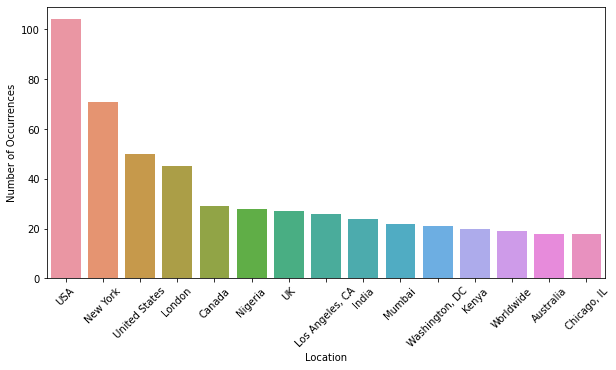

In [25]:
cnt_location = df['location'].value_counts()
top_15 = cnt_location.nlargest(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_15.index, y=top_15.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.xticks(rotation=45)
plt.show()

## Language detection

In [26]:
txt = df["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all  -->  en


In [27]:
df['lang'] = df["text"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
df.head()

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


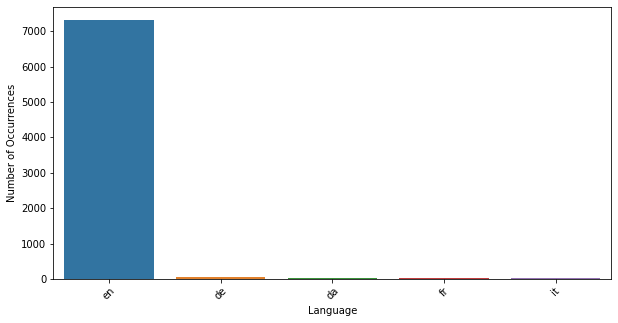

In [28]:
cnt_language = df['lang'].value_counts()
top_5 = cnt_language.nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_5.index, y=top_5.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Language', fontsize=10)
plt.xticks(rotation=45)
plt.show()

## Lenght Analysis

In [29]:
# word_count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
nlp = spacy.load("en_core_web_sm")
all_stop_words = nlp.Defaults.stop_words
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in all_stop_words]))

# url_count
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# hashtag_count
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

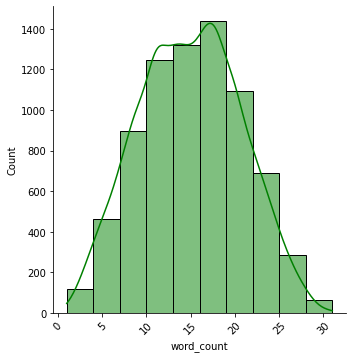

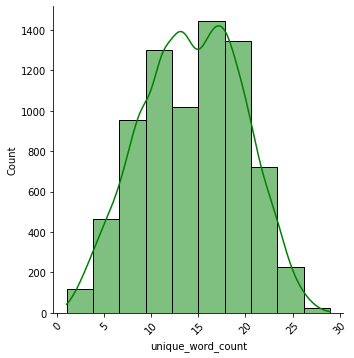

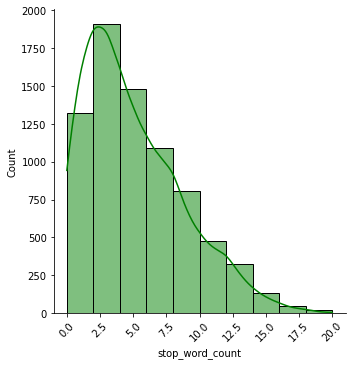

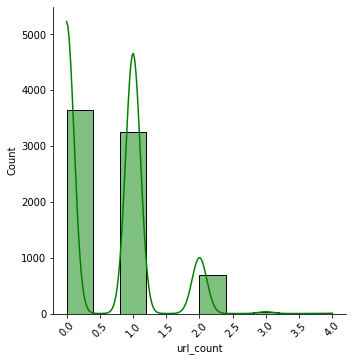

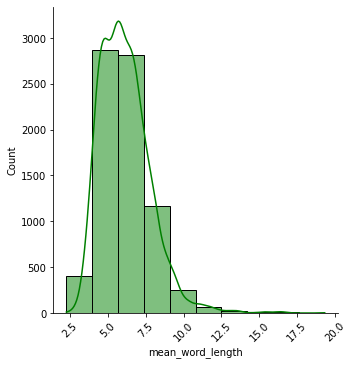

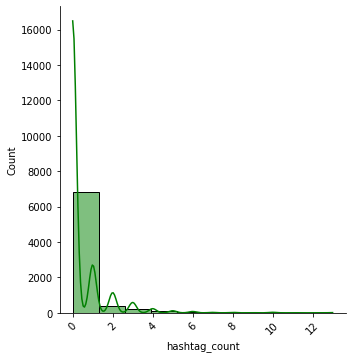

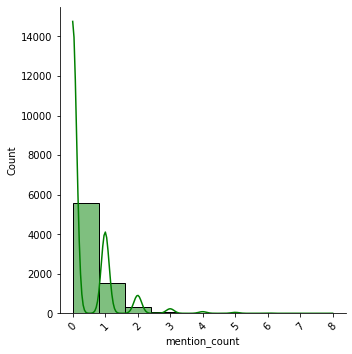

In [30]:
text_length = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                 'hashtag_count', 'mention_count']

for col in text_length:
    
    plt.rcParams["figure.figsize"] = (5,5)
    sns.displot(x=df[col], bins=10, color='green', kde=True)
    plt.xticks(rotation=45)
    plt.show()

## Wordcloud

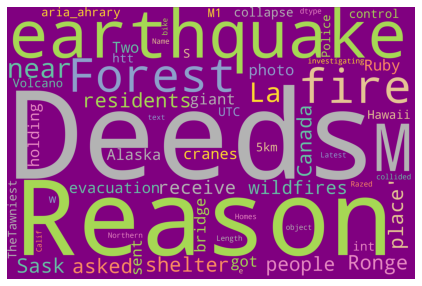

In [31]:
# Generate word cloud
# Create stopword
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=0, background_color='purple', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(str(df.text))
# Display the generated image
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
# export data set
#from google.colab import files
#df.to_csv('train_clean.csv')
#files.download('train_clean.csv') 